In [2]:
%matplotlib inline
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#connect to database file and import the db info into a df
conn = sqlite3.connect('factbook.db')
q = "SELECT * FROM sqlite_master WHERE type='table';"
df = pd.read_sql_query(q, conn)

In [3]:
df

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [4]:
#import the facts table into a df
q = 'SELECT * FROM facts LIMIT 5'
df = pd.read_sql_query(q, conn)
df

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


In [5]:
#find the min / max pop and min / max pop growth
q = 'SELECT MIN(population), MAX(population), MIN(population_growth), MAX(population_growth) FROM facts'
df = pd.read_sql_query(q, conn)
df

,MIN(population),MAX(population),MIN(population_growth),MAX(population_growth)
0,0,7256490011,0.0,4.02


In [7]:
#find the country with 0 population
q = "SELECT * FROM facts WHERE population == (SELECT MIN(population) FROM facts)"
df = pd.read_sql_query(q, conn)
df

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,250,ay,Antarctica,None,280000,None,0,None,None,None,None


In [10]:
#find the country with the max population value
q = 'SELECT * FROM facts WHERE population == (SELECT MAX(population) FROM facts)'
df = pd.read_sql_query(q, conn)
df

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None


## Observations
The factbook does not simply contain information with individual country as its subsets. In fact (pun unintended!) continents and the whole world are represented as individual rows as well.

In [14]:
#remove the exceptions (Antarctica and World) from the data
q = "SELECT * FROM facts WHERE population != (SELECT MIN(population) FROM facts) and population != (SELECT MAX(population) FROM facts)"
df = pd.read_sql_query(q, conn)
df.head()

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230.0,652230.0,0.0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748.0,27398.0,1350.0,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741.0,2381741.0,0.0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468.0,468.0,0.0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700.0,1246700.0,0.0,19625353,2.78,38.78,11.49,0.46


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f97f18d77f0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f97fa246438>]], dtype=object)

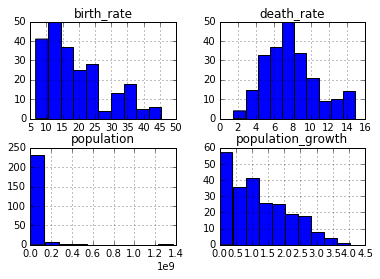

In [17]:
#generate histograms for population, population growth, birth rate, and death rate
cols = ['population','population_growth','birth_rate','death_rate']
df.hist(column=cols,layout=(2,2))

         name   pop_density
0       Macau  21168.964286
1      Monaco  15267.500000
2   Singapore   8259.784571
3   Hong Kong   6655.271202
4  Gaza Strip   5191.819444
5   Gibraltar   4876.333333
6     Bahrain   1771.859211
7    Maldives   1319.640940
8       Malta   1310.015823
9     Bermuda   1299.925926


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f97f1256208>]], dtype=object)

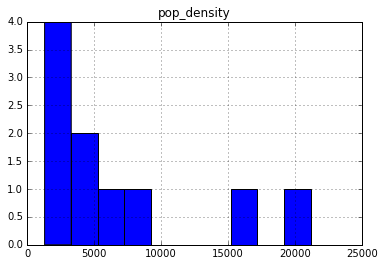

In [26]:
#find the top 10 countries by population density
q = '''
SELECT name, CAST(population AS Float)/CAST(area_land AS Float) as pop_density
FROM facts
ORDER BY pop_density DESC
LIMIT 10
'''

df = pd.read_sql_query(q, conn)
print(df)
df.hist()